In [37]:
import sys
import os
sys.path.insert(0, os.path.abspath('..\\diffpy'))
import numpy as np
import matplotlib.pyplot as plt
import trajectories as dt
import msds as msds

In [8]:
from scipy.optimize import curve_fit

In [2]:
x, y = dt.walk2D()

In [3]:
M, G = msds.trajMSD(x, y)

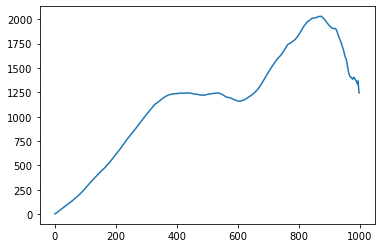

In [7]:
plt.plot(M)

In [12]:
def anomalous(x, D, alpha, dt):

    return 4*D*(x*dt)**alpha

In [13]:
dt = 0.01

def anom(x, D, alpha):
    return anomalous(x, D, alpha, dt=dt)

In [15]:
steps = M.shape[0] + 1

In [19]:
N = np.linspace(1, steps-1, steps-1)

In [25]:
alphas = np.zeros(steps-1)
Ds = np.zeros(steps-1)
for i in range(10, steps-1):
    ps, _ = curve_fit(anom, N[:i], M[:i], p0=[1,1])
    Ds[i] = ps[0]
    alphas[i] = ps[1]

In [21]:
curve_fit(anom, N, M, p0=[1, 1])

(array([107.27040575,   0.64916821]),
 array([[ 4.67649545e+00, -2.21475558e-02],
        [-2.21475558e-02,  1.10585988e-04]]))

In [22]:
Mfit = anom(N, 107.27, 0.649)

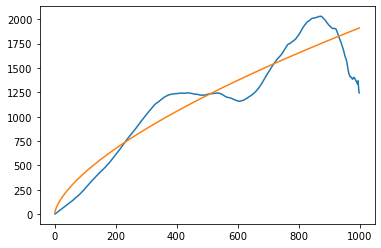

In [23]:
plt.plot(N, M)
plt.plot(N, Mfit)

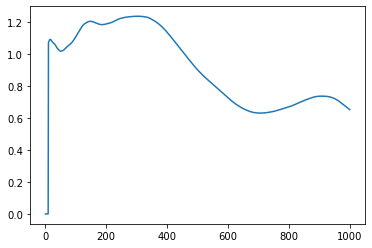

In [29]:
plt.plot(N, alphas)

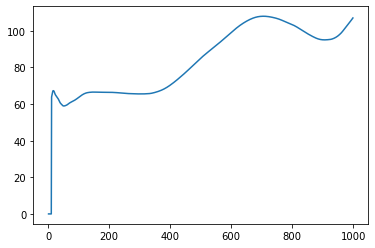

In [30]:
plt.plot(N, Ds)

In [76]:
def anomModels(MSD, dt, skips=1):
    # Calculates the anomalous diffusion model parameters for a single particle
    # from its MSD profile over multiple timespans
    # By default, fits the model to all possible MSD profiles of at least 10 frames
    
    def anom(x, D, alpha):
        return anomalous(x, D, alpha, dt=dt)
    
    steps = MSD.shape[0] + 1
    N = np.linspace(1, steps-1, steps-1)
    
    alphas = np.zeros(steps-1)
    Ds = np.zeros(steps-1)
    for i in range(10, steps-1, skips):
        ps, _ = curve_fit(anom, N[:i], MSD[:i], p0=[6,1])
        Ds[i] = ps[0]
        alphas[i] = ps[1]
        
    return Ds, alphas

In [77]:
def anomModel(MSD, dt, frame=100):
    # Calculates the anomalous diffusion model parameters for multiple
    # particle trajectories. The user specifies up to which frame to include
    # in the MSD trajectory to use in the model fit.

    def anom(x, D, alpha):
        return anomalous(x, D, alpha, dt=dt)
    
    steps = MSD.shape[0] + 1
    N = np.linspace(1, steps-1, steps-1)
    
    ps, _ = curve_fit(anom, N[:frame], MSD[:frame], p0=[6,1])
    D = ps[0]
    alpha = ps[1]
        
    return D, alpha

In [78]:
def anomModelN(MSD, dt, frame=100):
    # Calculate the anomalous diffusion model parameters for multiple particle
    # trajectories.

    def anom(x, D, alpha):
        return anomalous(x, D, alpha, dt=dt)
    
    steps, N = MSD.shape
    n = np.linspace(1, steps, steps)
    
    Ds = np.zeros(N)
    alphas = np.zeros(N)
    for i in range(N):
        ps, _ = curve_fit(anom, n[:frame], MSD[:frame, i], p0=[6,1])
        Ds[i] = ps[0]
        alphas[i] = ps[1]
        
    return Ds, alphas

In [85]:
def anomModelsN(MSD, dt, skips=1):
    # Calculate the anomalous diffusion model parameters for multiple particle
    # trajectories over multiple MSD window frames.

    def anom(x, D, alpha):
        return anomalous(x, D, alpha, dt=dt)
    
    steps, N = MSD.shape
    n = np.linspace(1, steps, steps)
    
    Ds = np.zeros((steps, N))
    alphas = np.zeros((steps, N))
    for i in range(N):
        for frame in range(10, steps, skips):
            ps, _ = curve_fit(anom, n[:frame], MSD[:frame, i], p0=[6,1])
            Ds[frame, i] = ps[0]
            alphas[frame, i] = ps[1]
        
    return Ds, alphas

In [36]:
anomModel(M, 0.1, frame=100)

(4.97547543661611, 1.1082052965301958)

In [55]:
x, y = dt.walks2D(steps=100, N=1000)
Ms, Gs = msds.trajsMSD(x, y)

In [39]:
x.shape

(100, 10)

In [86]:
Ds, alphas = anomModelsN(Ms, 0.1)

(0.0, 3.0)

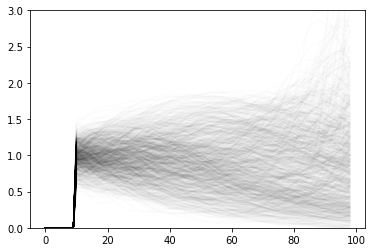

In [92]:
for i in range(1000):
    plt.plot(alphas[:, i], c='k', alpha=0.01)

plt.ylim([0, 3])

(0.0, 10.0)

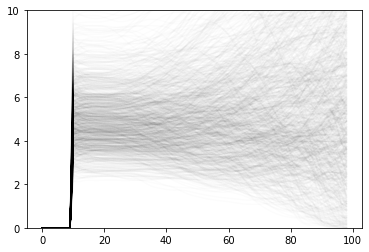

In [94]:
for i in range(1000):
    plt.plot(Ds[:, i], c='k', alpha=0.01)

plt.ylim([0, 10])

In [88]:
Ms.shape

(99, 1000)

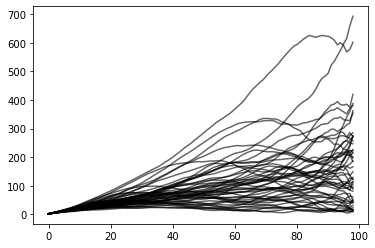

In [60]:
for i in range(50):
    plt.plot(Ms[:, i], c='k', alpha=0.6)

In [61]:
from seaborn import stripplot

<AxesSubplot:>

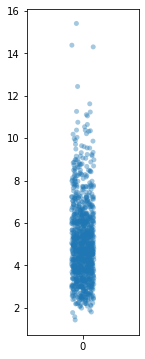

In [73]:
fig, ax = plt.subplots(figsize=(2, 6))
stripplot(data=Ds, ax=ax, alpha=0.4)

<AxesSubplot:>

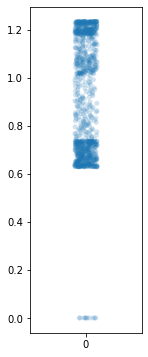

In [74]:
fig, ax = plt.subplots(figsize=(2, 6))
stripplot(data=alphas, ax=ax, alpha=0.2)

In [75]:
np.min(alphas)

0.0

(-20.0, 20.0)

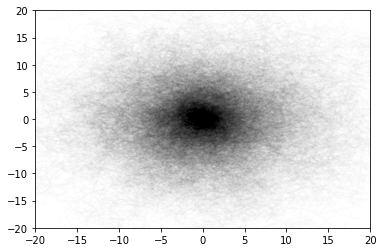

In [97]:
for i in range(1000):
    plt.plot(x[:, i], y[:, i], alpha=0.01, color='k')
    
plt.xlim([-20, 20])
plt.ylim([-20, 20])